# INTRODUCTION




# Road Quality

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import operator
import geopandas as gpd

In [8]:
data = pd.read_csv("road_data.csv")
data.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,203364.0,2017-12-15T14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-7,-80.016716,40.454144,EXACT
1,200800.0,2017-11-29T09:54:00,Graffiti,Control Panel,1,Police - Zones 1-6,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.969952,40.429243,APPROXIMATE
2,201310.0,2017-12-01T13:23:00,Litter,Call Center,1,DPW - Street Maintenance,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.985859,40.459716,EXACT
3,200171.0,2017-11-22T14:54:00,Water Main Break,Call Center,1,Pittsburgh Water and Sewer Authority,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.034210,40.406969,EXACT
4,193043.0,2017-10-12T12:46:00,Guide Rail,Call Center,1,DPW - Construction Division,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-19,-79.876582,40.451226,EXACT


****

In [34]:
dataF = data[data['STATUS'] != 1]
dataF.head(10)

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
8,179176.0,2017-08-14T14:00:00,Neighborhood Issues,Control Panel,0,NaN,Middle Hill,6.0,5.0,4.200305e+10,3.0,5.0,2.0,2-1,-79.977726,40.446142,APPROXIMATE
12,182748.0,2017-08-28T12:49:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.029944,40.486596,APPROXIMATE
13,184662.0,2017-09-05T13:49:00,Abandoned Vehicle (parked on street),Call Center,0,Police - AVU,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.027634,40.470334,APPROXIMATE
15,185902.0,2017-09-11T13:49:00,Parks Trails,Call Center,0,DPW - Park Maintenance,NaN,6.0,1.0,4.200302e+10,NaN,1.0,NaN,1-4,-80.005966,40.438043,EXACT
22,167825.0,2017-07-06T15:26:00,Illegal Dumping,Control Panel,0,DOMI - Permits,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-20,-79.997763,40.452695,APPROXIMATE
27,170189.0,2017-07-14T15:37:00,Mayor's Office,Call Center,0,311,Bloomfield,7.0,8.0,4.200308e+10,2.0,8.0,5.0,2-23,-79.948119,40.455066,APPROXIMATE
33,147753.0,2017-04-24T14:42:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-21,-80.012632,40.455277,APPROXIMATE
34,133416.0,2017-02-22T12:12:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Spring Hill-City View,1.0,26.0,4.200326e+10,1.0,26.0,1.0,1-11,-79.998422,40.470484,APPROXIMATE
35,136289.0,2017-03-03T10:34:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.984233,40.462590,APPROXIMATE
36,138513.0,2017-03-09T13:12:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Manchester,6.0,21.0,4.200321e+10,1.0,21.0,1.0,1-8,-80.023816,40.453369,APPROXIMATE


**The first thing we need to do is get rid of all of the non-active reports which we do by filtering out all rows with a value of 1 in the status row.**

# Quanitity of Reports

<BarContainer object of 23 artists>

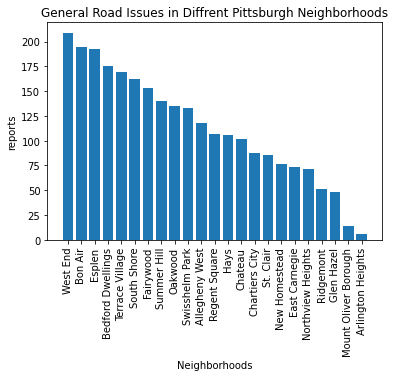

In [126]:
totals = dict()

totals = dataF['NEIGHBORHOOD'].value_counts()
descending_totals = dict( sorted(totals.items(), key=operator.itemgetter(1),reverse=True))

da = dict(list(descending_totals.items())[len(descending_totals)//2:])
db = dict(list(descending_totals.items())[:len(descending_totals)//2])

d1 = dict(list(da.items())[len(da)//2:])
d2 = dict(list(da.items())[:len(da)//2])
d3 = dict(list(db.items())[len(db)//2:])
d4 = dict(list(db.items())[:len(db)//2])

keys = d1.keys()
values = d1.values()
plt.xticks(rotation=90)
plt.title('General Road Issues in Diffrent Pittsburgh Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Reports')
plt.bar(keys, values)

<BarContainer object of 23 artists>

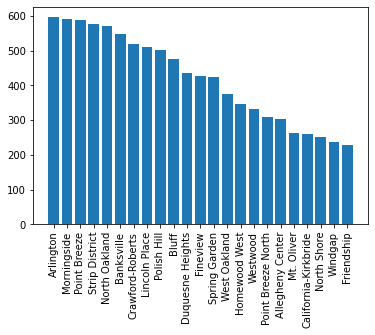

In [122]:
keys = d2.keys()
values = d2.values()
plt.xticks(rotation=90)
plt.title('General Road Issues in Diffrent Pittsburgh Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Reports')
plt.bar(keys, values)

<BarContainer object of 23 artists>

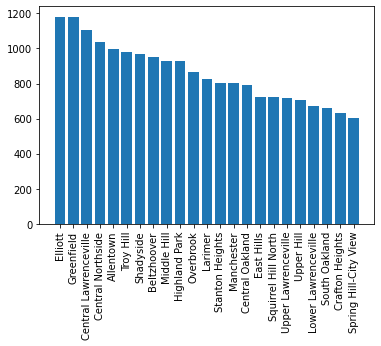

In [123]:
keys = d3.keys()
values = d3.values()
plt.xticks(rotation=90)
plt.title('General Road Issues in Diffrent Pittsburgh Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Reports')
plt.bar(keys, values)

<BarContainer object of 22 artists>

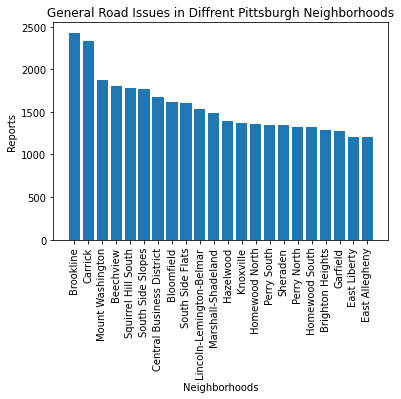

In [127]:
keys = d4.keys()
values = d4.values()
plt.xticks(rotation=90)
plt.title('General Road Issues in Diffrent Pittsburgh Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Reports')
plt.bar(keys, values)

****

# Final Thoughts

In [132]:
print("The neighborhood with most reports is Brookline with:", descending_totals['Brookline'])
print("The neighborhood with least reports is Arlington Heights with:",descending_totals['Arlington Heights'])

The neighborhoods with most reports is Brookline with: 2430
The neighborhoods with least reports is Arlington Heights with: 6


**So, in terms of quality of roads alone, Brookline is the worst neighborhood and Arlington Heights is the best. Brookline doesn't even rank in the top 20 neighborhoods in terms of population so it isn't just because there are more people using the roads and reporting problems. The same goes with Arlinton too. Arlington has 20th least population, but there are neighborhoods with more less people with many more reports. 